# Mean and standard deviation

**Problem 3a.** In this problem we look at the mean and the standard deviation from a more statistical point of view.
 * Generate $N=1\,000$ values $x_1,\ldots,x_n$ from Poisson($\lambda$) distribution for $\lambda=10$. You might want to use the function **poisson(lambda,shape)** from package **numpy.random**.
 * Plot a histogram of these values. What is the mean of Poisson($\lambda$)? What is the standard deviation? Are these values a good description of what you see in the histogram?
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$. Plot the values of $\bar{x}_i$.
 * On the same figure, plot a horizontal line corresponding to the expected value ($\lambda$) of all those averages.
 * Compute (analitically) the standard deviation $\sigma_i$ of the $i$-th average and plot lines $\lambda \pm \sigma_i$, again on the same figure.
 * Does the standard deviation accurately describe the *typical* deviations?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample4():
    sign = np.random.randint(4)
    # 0 with probability 1/2
    if sign < 2:
        return 0
    x = np.random.rand()
    x = 1 - x
    x_term = np.floor(1 / x)
    steps = [-2, -1, 0, 1, 2]
    for step in steps:
        k_cand = max(1, x_term + step)
        if (k_cand + 1) >= x_term >= k_cand:
            break
    if sign == 2:
        k_cand = -k_cand
    return k_cand

# 5.
N = 10000
ys = np.array(list(sample4() for i in range(N)))

# 6.
means = np.cumsum(ys) / range(1, N+1)

# 7.
plt.plot(range(N), means)
plt.show()

**Problem 3b.** In this task we consider a discrete distribution *without a mean* and verify whether we can still estimate the location of its peak by simply computing averages. Consider a discrete variable $X$ with the following distribution: $P(X=k) = \frac{1}{4|k|(|k|+1)}$ for $k \neq 0$ and $P(X=0) = \frac{1}{2}$.
 * Argue that these formulas indeed describe a discrete distribution.
 * Show that $X$ does not have a mean.
 * Plot the function $f(k) = P(X=k)$ for $k \in [-10,10]$.
 * Write a function that samples from $X$'s distribution (imaginary bonus points if it is vectorized).
 * Generate $N=10\,000$ values $x_1,\ldots,x_n$ from the distribution.
 * For $i \in \{1,\ldots,n\}$ compute $\bar{x}_i = \frac{x_1+\ldots+x_i}{i}$.
 * Plot the values of $\bar{x}_i$. Does it look like the series converges? If it is not clear, you can compute several independent
   $N$-means and plot a histogram, then increase $N$ significantly and see how it changes.
 * For $i \in \{1,\ldots,n\}$ compute $\hat{x}_i = \textrm{ median of }\{x_1,\ldots,x_i\}$.
   You do not need to do it in a clever way (like in ASD lab).
 * Plot the values of $\hat{x}_i$. Does it look like the series converges?
 * A more interesting situation would be the one where you a given a distribution like $X+c$ for unknown $c$, and
   want to figure out what $c$ is, i.e. find the center of the distribution. Both methods above attempt to
   locate the center - which works better?

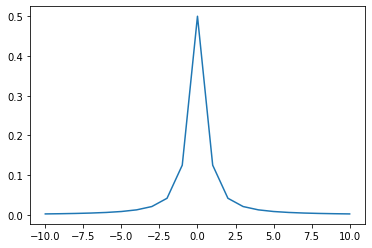

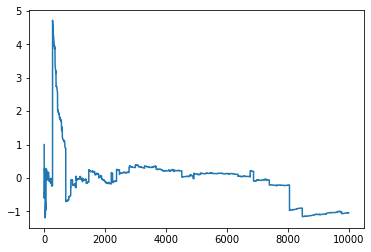

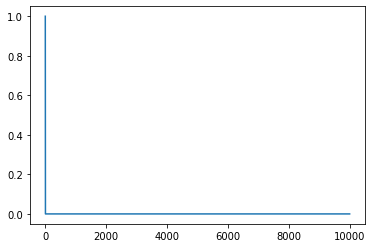

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def sample(N):
    sign = np.random.choice([0, 0, 1, -1], N) #0 with prob 0.5, positive number with 0.25
    temp = 1 - np.random.rand(N) #half-open interval (0.0, 1.0]
    temp = 1 / temp
    result = np.floor(temp).astype('int64')
    return result * sign

def f(k):
    if k == 0:
        return 0.5
    else:
        if k < 0:
            k = -k
        return 1 / (4 * k * (k + 1))
#3
r = range(-10, 11)
plot_values = [f(k) for k in r]
plt.plot(r, plot_values)
plt.show()

#4,5
N = 10000
values = sample(N)
#6,7
means = np.cumsum(values).astype(np.float32) / np.arange(1, N + 1)
plt.plot(means)
plt.show()
#it doesn't look like the series converges

#8,9
medians = np.array([np.median(values[:i + 1]) for i in range(N)])
plt.plot(medians)
plt.show()
#it looks like the series converges


